## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
#get labels
data = pd.read_csv("Datasets/Normalized_CWE-119.csv.gz")
#get embeddings 
x= pd.read_csv("graph2vec/features/embledding_cwe_119.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48314 entries, 0 to 48313
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48314 non-null  int64 
 1   testID      48314 non-null  int64 
 2   filename    48314 non-null  object
 3   code        48314 non-null  object
 4   vuln        48314 non-null  bool  
 5   type        48314 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 1.9+ MB


In [3]:
x.head()

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,0,-0.163826,0.137202,0.149466,0.004281,0.150862,0.178275,-0.033835,-0.122319,-0.192090,...,0.170615,0.125055,0.078364,-0.079257,-0.010951,0.208288,0.000168,-0.203756,0.023559,0.015706
1,1,0.018108,0.103102,0.031768,-0.143475,-0.002524,0.050258,-0.009940,-0.140832,-0.068170,...,0.131703,-0.019603,0.086455,0.036294,0.008464,0.106795,0.120333,-0.032687,0.016373,0.075733
2,10,0.117577,0.082759,0.024322,-0.161535,-0.063714,0.127932,-0.094762,-0.091637,-0.031762,...,0.029771,0.102762,0.104139,-0.024629,-0.048160,-0.043632,0.030779,-0.045054,0.022018,-0.029362
3,100,0.209571,-0.011403,0.032779,-0.158052,-0.124047,0.158597,0.094135,-0.236848,-0.055214,...,0.110214,-0.006235,-0.072359,0.128481,0.018276,0.117344,0.052411,0.239592,-0.055437,0.059034
4,1000,0.109127,0.018979,0.140675,-0.269741,-0.114848,0.258960,-0.057146,-0.059846,-0.121928,...,0.188196,0.175792,0.092403,-0.131219,-0.161042,-0.083242,-0.153114,-0.085939,0.091325,0.142278


In [4]:
# Get the type column index before it's dropped
indices = x['type'].values
y = data.iloc[:, 4]
y_labels = y.iloc[indices]
y_labels.head()

0        True
1        True
10       True
100      True
1000    False
Name: vuln, dtype: bool

In [5]:
x = x.drop(columns="type")
x.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,-0.163826,0.137202,0.149466,0.004281,0.150862,0.178275,-0.033835,-0.122319,-0.192090,0.304671,...,0.170615,0.125055,0.078364,-0.079257,-0.010951,0.208288,0.000168,-0.203756,0.023559,0.015706
1,0.018108,0.103102,0.031768,-0.143475,-0.002524,0.050258,-0.009940,-0.140832,-0.068170,0.187087,...,0.131703,-0.019603,0.086455,0.036294,0.008464,0.106795,0.120333,-0.032687,0.016373,0.075733
2,0.117577,0.082759,0.024322,-0.161535,-0.063714,0.127932,-0.094762,-0.091637,-0.031762,0.105637,...,0.029771,0.102762,0.104139,-0.024629,-0.048160,-0.043632,0.030779,-0.045054,0.022018,-0.029362
3,0.209571,-0.011403,0.032779,-0.158052,-0.124047,0.158597,0.094135,-0.236848,-0.055214,0.018782,...,0.110214,-0.006235,-0.072359,0.128481,0.018276,0.117344,0.052411,0.239592,-0.055437,0.059034
4,0.109127,0.018979,0.140675,-0.269741,-0.114848,0.258960,-0.057146,-0.059846,-0.121928,0.181700,...,0.188196,0.175792,0.092403,-0.131219,-0.161042,-0.083242,-0.153114,-0.085939,0.091325,0.142278


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y_labels, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43482, 128) (4832, 128) (43482,) (4832,)


## SVM

Training a linear SVM with default parameters

In [9]:
svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ))
svm_clf.fit(X_train, y_train)

c:\Users\ireen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [10]:
y_pred_svm=svm_clf.predict(X_test)

Plotting the cofusion matrix and performance metrics

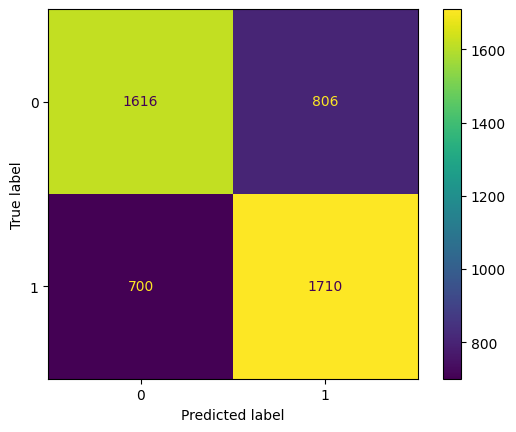

 Accuracy : 0.6883278145695364 
 Precision : 0.6796502384737679 
 Recall : 0.7095435684647303 
 F1 : 0.6942752740560292 


In [11]:
# Display confusion matrix
cm_SVM = confusion_matrix(y_test, y_pred_svm)
disp_SVM = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
disp_SVM.plot()
plt.show()

accuracy_SVM = accuracy_score(y_test, y_pred_svm)
precision_SVM = precision_score(y_test, y_pred_svm, zero_division=1)
recall_SVM = recall_score(y_test, y_pred_svm, zero_division=1)
F1_SVM = f1_score(y_test, y_pred_svm, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2} \n F1 : {3} ".format(accuracy_SVM, precision_SVM, recall_SVM, F1_SVM))

## XGBoost

In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# 6️⃣ Initialize XGBoost classifier
model = xgb.XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    eval_metric="mlogloss",  # Log loss for classification
    use_label_encoder=False,
    num_class=len(np.unique(y)),  # Number of classes
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Depth of trees
    subsample=0.8,  # Prevents overfitting
    colsample_bytree=0.8,  # Features per tree
    random_state=42
)

# 7️⃣ Train the model
print("\nTraining the XGBoost model...")
model.fit(X_train, y_train)

# 8️⃣ Make predictions
y_pred_XG = model.predict(X_test)

# 9️⃣ Evaluate the model
accuracy = accuracy_score(y_test, y_pred_XG)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_XG))


Training the XGBoost model...


c:\Users\ireen\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Accuracy: 0.7115

Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.66      0.70      2422
        True       0.69      0.76      0.72      2410

    accuracy                           0.71      4832
   macro avg       0.71      0.71      0.71      4832
weighted avg       0.71      0.71      0.71      4832



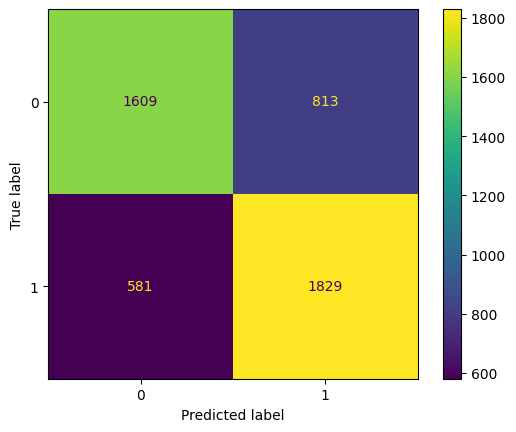

 Accuracy : 0.7115 
 Precision : 0.7135 
 Recall : 0.7115 
 F1 : 0.7109 


In [13]:
# Compute confusion matrix
cm_XG = confusion_matrix(y_test, y_pred_XG)

# Display confusion matrix
disp_XG = ConfusionMatrixDisplay(confusion_matrix=cm_XG)
disp_XG.plot()
plt.show()

# Compute performance metrics
accuracy_XG = accuracy_score(y_test, y_pred_XG)
precision_XG = precision_score(y_test, y_pred_XG, average="weighted", zero_division=1)
recall_XG = recall_score(y_test, y_pred_XG, average="weighted", zero_division=1)
F1_XG = f1_score(y_test, y_pred_XG, average="weighted", zero_division=1)

print(" Accuracy : {0:.4f} \n Precision : {1:.4f} \n Recall : {2:.4f} \n F1 : {3:.4f} ".format(accuracy_XG, precision_XG, recall_XG, F1_XG))

## Comparison of SVM and XGBoost

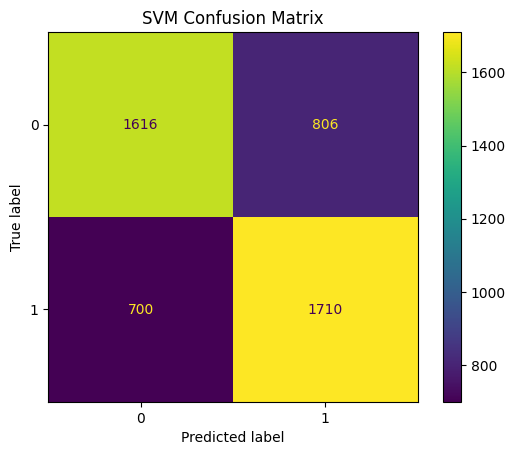


🔹 **SVM Performance Metrics:**
 Accuracy : 0.6883 
 Precision : 0.6797 
 Recall : 0.7095 
 F1 Score : 0.6943


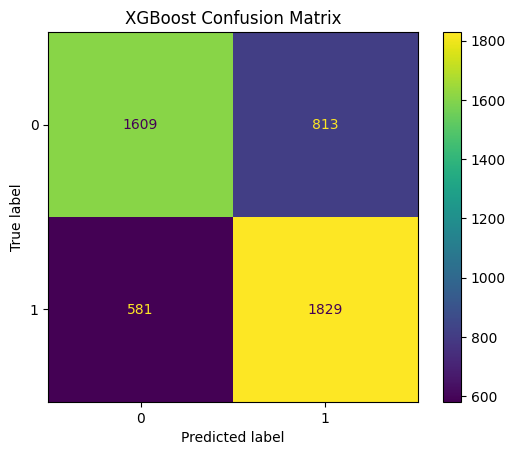


🔹 **XGBoost Performance Metrics:**
 Accuracy : 0.7115 
 Precision : 0.6923 
 Recall : 0.7589 
 F1 Score : 0.7241

📊 **Comparison Summary:**
 Model      | Accuracy  | Precision | Recall   | F1 Score 
-----------|-----------|-----------|-----------|-----------
 SVM       | 0.6883   | 0.6797   | 0.7095   | 0.6943
 XGBoost   | 0.7115   | 0.6923   | 0.7589   | 0.7241


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# SVM Performance Metrics & Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_svm)
disp_SVM = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
disp_SVM.plot()
plt.title("SVM Confusion Matrix")
plt.show()

accuracy_SVM = accuracy_score(y_test, y_pred_svm)
precision_SVM = precision_score(y_test, y_pred_svm ,zero_division=1)
recall_SVM = recall_score(y_test, y_pred_svm, zero_division=1)
F1_SVM = f1_score(y_test, y_pred_svm, zero_division=1)

print("\n🔹 **SVM Performance Metrics:**")
print(" Accuracy : {:.4f} \n Precision : {:.4f} \n Recall : {:.4f} \n F1 Score : {:.4f}".format(accuracy_SVM, precision_SVM, recall_SVM, F1_SVM))

# XGBoost Performance Metrics & Confusion Matrix
cm_XG = confusion_matrix(y_test, y_pred_XG)
disp_XG = ConfusionMatrixDisplay(confusion_matrix=cm_XG)
disp_XG.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()

accuracy_XG = accuracy_score(y_test, y_pred_XG)
precision_XG = precision_score(y_test, y_pred_XG, zero_division=1)
recall_XG = recall_score(y_test, y_pred_XG, zero_division=1)
F1_XG = f1_score(y_test, y_pred_XG, zero_division=1)

print("\n🔹 **XGBoost Performance Metrics:**")
print(" Accuracy : {:.4f} \n Precision : {:.4f} \n Recall : {:.4f} \n F1 Score : {:.4f}".format(accuracy_XG, precision_XG, recall_XG, F1_XG))

# Compare results side by side
print("\n📊 **Comparison Summary:**")
print(" Model      | Accuracy  | Precision | Recall   | F1 Score ")
print("-----------|-----------|-----------|-----------|-----------")
print(" SVM       | {:.4f}   | {:.4f}   | {:.4f}   | {:.4f}".format(accuracy_SVM, precision_SVM, recall_SVM, F1_SVM))
print(" XGBoost   | {:.4f}   | {:.4f}   | {:.4f}   | {:.4f}".format(accuracy_XG, precision_XG, recall_XG, F1_XG))